# The analysis is incomplete..... in progress

In [1]:
'''
    ----------------------------------------------------------------------------------------------
    April 2022
    Dr. Kamanasish Debnath
    Postdoctoral Researcher
    Wallenberg Center for Quantum Technology (WACQT)
    Chalmers University of Technology
    
    kamanasish.debnath@gmail.com
    Data set used: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data
    ----------------------------------------------------------------------------------------------
    
    
    The data set contains atmospheric features such as mean temperature, humidity, wind speed 
    and mean pressure for 113 days in Delhi, India. 
    
    The aim is to predict the features using different time series algorithms. 
    
    Algorithms which will be used are- 
    1. Triple exponential smoothing  
    2. 
    3.
    
''';

In [360]:
# Import all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import datetime 
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ExponentialSmoothing

In [405]:
def _ss_decompose(data, period, mod = []):
    '''
    This function takes a data frame as input and decomposes
    it into trend, season and residue.
    
    Arguments-
    data         :      Data to be decomposed
    period       :      Period of the series
    mod          :      Model- Additive or Multiplicative
    
    
    Returns-
    trend        :      Trend attributes
    season       :      Season attributes
    residue      :      Residue attributes    
    
    '''
    
    
    ss_decompose = seasonal_decompose(x = df.meantemp, period = period)
    trend = ss_decompose.trend
    season = ss_decompose.seasonal
    residue = ss_decompose.resid
    return trend, season, residue
    
    
    

def _ExpoSmoothing(train, test, trend_type, season_type, periods):
    '''
    This function performs triple exponential smoothing and returns
    an array of predictions, mean squared error and the model.
    
    Arguments-
    train, test      :     Train and test data
    trend_type       :     additive or multiplicative
    season_type      :     additive or multiplicative
    periods          :     Number of seasonal_periods
    
    Returns-
    predictions      :     Predicted forecast
    mse              :     Mean squared error
    tripleExpo       :     Fitted model 
    '''
    
    
    tripleExpo = ExponentialSmoothing(train,
                                 trend = trend_type,
                                 seasonal = season_type,
                                 initialization_method='estimated',
                                 seasonal_periods = periods).fit(optimized = True)
    
    

    predictions = tripleExpo.forecast(len(test))
    mse = np.round(mean_squared_error(Test, predictions), 3)
    return predictions, mse, tripleExpo

## Data exploration

In [3]:
df = pd.read_csv("DailyDelhiClimateTest.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [4]:
# Converting the column date into datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

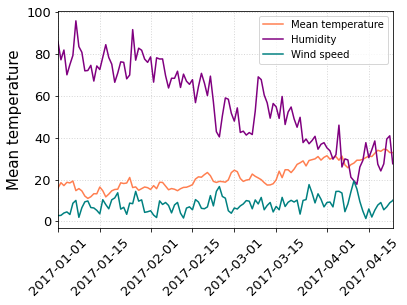

In [421]:
# Plotting the time series data
sns.lineplot(data = df, x='date', y='meantemp', color = 'coral', linewidth=1.5, label = 'Mean temperature')
sns.lineplot(data = df, x='date', y='humidity', color = 'purple', linewidth=1.5, label = 'Humidity')
sns.lineplot(data = df, x='date', y='wind_speed', color = 'teal', linewidth=1.5, label = 'Wind speed')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);
plt.grid('on', linewidth = 1, linestyle = ':', alpha= 0.5)
plt.xlabel('', fontsize = 15)
plt.ylabel('Mean temperature', fontsize = 15)
plt.xlim([df.date[0], df.date[112]]);
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.savefig("Features.pdf")

In [100]:
'''
From the above plot it is evident that the data is non stationary, meaning
that the data has trend, season and residue. 

However, we can verify that using Augmented Dickey-Fuller (ADF) Test which 
uses the following hypothesis testing- 

Null hypothesis H0 : The data is non stationary
If the p-value from the test is less than 0.05, we can reject the hypothesis
and conclude that the data is stationary.
'''

_,pvalue,_,_,_,_ = adfuller(df.meantemp)
print("p-value for mean temperature is", np.round(pvalue, 3))

_,pvalue,_,_,_,_ = adfuller(df.humidity)
print("p-value for humidity is", np.round(pvalue, 3))

_,pvalue,_,_,_,_ = adfuller(df.wind_speed)
print("p-value for wind speed is", np.round(pvalue, 3))

_,pvalue,_,_,_,_ = adfuller(df.meanpressure)
print("p-value for mean pressure is", np.round(pvalue, 3))

p-value for mean temperature is 0.716
p-value for humidity is 0.853
p-value for wind speed is 0.0
p-value for mean pressure is 0.213


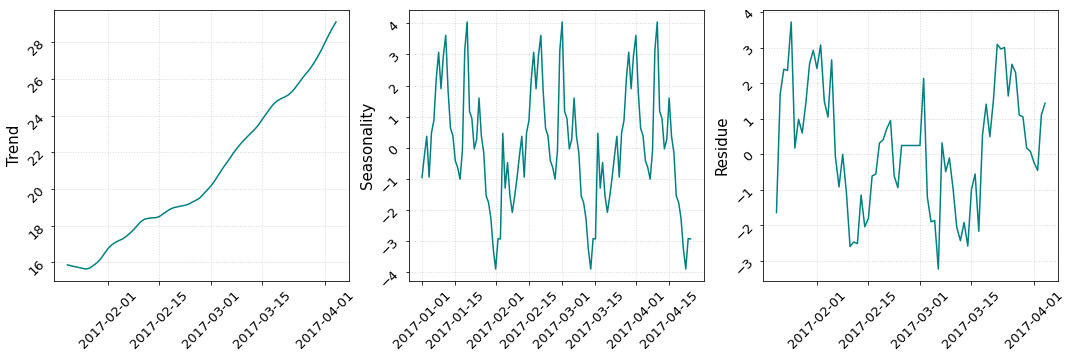

In [422]:
'''
Hence from the above ADF analysis, it is clear that we can reject the 
hypothesis only for wind_speed and rest all data are non stationary.

Mean temperature : Non stationary data
Humidity         : Non stationary data
Wind speed       : Stationary
Mean pressure    : Non stationary data


In this section, we would decompose the non stationary data into its 
respective trend, season and residue.
'''

trend, season, residue = _ss_decompose(df.meantemp, 40)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].plot(df.date, trend, color = 'teal')
axs[0].tick_params(labelrotation=45)
axs[0].grid('on', linewidth = 1, linestyle = ':', alpha= 0.5)
axs[0].set_xlabel('',fontsize = 15)
axs[0].set_ylabel('Trend', fontsize = 15)
axs[0].tick_params(axis='x', labelsize=13)
axs[0].tick_params(axis='y', labelsize=13)


axs[1].plot(df.date, season, color = 'teal')
axs[1].tick_params(labelrotation=45)
axs[1].grid('on', linewidth = 1, linestyle = ':', alpha= 0.5)
axs[1].set_xlabel('',fontsize = 15)
axs[1].set_ylabel('Seasonality', fontsize = 15)
axs[1].tick_params(axis='x', labelsize=13)
axs[1].tick_params(axis='y', labelsize=13)


axs[2].plot(df.date, residue, color = 'teal')
axs[2].tick_params(labelrotation=45)
axs[2].grid('on', linewidth = 1, linestyle = ':', alpha= 0.5)
axs[2].set_xlabel('',fontsize = 15)
axs[2].set_ylabel('Residue', fontsize = 15)
axs[2].tick_params(axis='x', labelsize=13)
axs[2].tick_params(axis='y', labelsize=13)

plt.savefig("Decompose.pdf")

## Forecasting mean temperature using Triple Exponential Smoothing

In [406]:
# Finding the optimal parameter and type of trend and seasonality 
# by evaluating mean squared errors

# Train-test split
Train = df.meantemp[:-10]
Test = df.meantemp[len(Train):]


error_add_add = []
error_add_mul = []
error_mul_add = []
error_mul_mul = []

for seasons in range(3,30):
    
    
    _, mse, _ = _ExpoSmoothing(Train, Test, 'add', 'add', seasons)
    error_add_add.append(mse)
    
    _, mse, _ = _ExpoSmoothing(Train, Test, 'add', 'mul', seasons)
    error_add_mul.append(mse)
    
    _, mse, _ = _ExpoSmoothing(Train, Test, 'mul', 'add', seasons)
    error_mul_add.append(mse)
    
    _, mse, _ = _ExpoSmoothing(Train, Test, 'mul', 'mul', seasons)
    error_mul_mul.append(mse)


C:\Users\debnathk\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\debnathk\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\debnathk\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\debnathk\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\debnathk\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\debnathk\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\debnathk\Anaconda3\lib\site-packages\statsmodels\tsa\holtwint

## Print the errors in different combinations of "add" and "mul" for different seasons

In [418]:
print("Mean squared errors for different trend and seasonal types")
data = {'Seasonal_periods':range(3,30), 'Add-Add':error_add_add, 'Add-Mul':error_add_mul, \
        'Mul-Add':error_mul_add, 'Mul-Mul':error_mul_mul} 

pd.DataFrame(data)

Mean squared errors for different trend and seasonal types


,Seasonal_periods,Add-Add,Add-Mul,Mul-Add,Mul-Mul
0,3,3.424,3.172,3.421,3.031
1,4,4.246,4.358,4.211,4.265
2,5,3.289,2.889,3.248,2.614
3,6,3.115,2.605,3.051,2.445
4,7,3.928,3.901,3.856,3.706
5,8,4.119,4.734,4.078,4.630
6,9,8.557,10.378,8.536,10.215
7,10,4.026,4.046,4.175,3.769
8,11,8.479,10.812,8.429,10.969
9,12,2.333,2.174,2.299,2.017


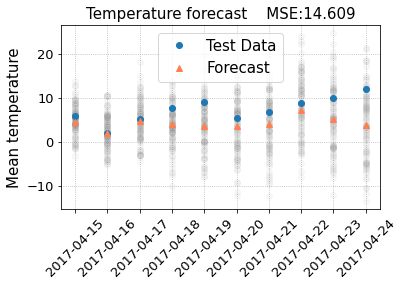

In [452]:
'''
From the above table it is clear that the model with trend = 'add'
and season = 'add' has least error for Seasonal_periods = 12.

In this section, we plot the results for this collection of hypertuned
parameters.
'''

pred, mse_temp, model = _ExpoSmoothing(Train, Test, 'add', 'add', 12)
simulations = model.simulate(10, repetitions=100, error="additive")
for i in range(len(simulations.T)):
    plt.plot(df.date[len(Train):], simulations.iloc[:,i], 'o', alpha=0.05, color="gray")
plt.grid('on',linestyle = ':')
plt.plot(df.date[len(Train):], Test, 'o', label = 'Test Data')
plt.plot(df.date[len(Train):], pred, '^' ,color= 'coral', label = 'Forecast')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);
plt.legend(fontsize = 15, loc = 'upper center')
plt.xlabel('', fontsize = 15)
plt.ylabel('Mean temperature', fontsize = 15)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.title('Temperature forecast    MSE:%1.3f' % mse_temp, fontsize = 15);
plt.subplots_adjust(left=0.16)
plt.subplots_adjust(bottom=0.24)
plt.savefig("Temp_forecast_Exp_smoothing.pdf")

# Forecasting humidity using triple exponential smoothing

In [426]:
# Train-test split
Train = df.humidity[:-10]
Test = df.humidity[len(Train):]


error_add_add = []
error_add_mul = []
error_mul_add = []
error_mul_mul = []

for seasons in range(3,30):
    
    
    _, mse, _ = _ExpoSmoothing(Train, Test, 'add', 'add', seasons)
    error_add_add.append(mse)
    
    _, mse, _ = _ExpoSmoothing(Train, Test, 'add', 'mul', seasons)
    error_add_mul.append(mse)
    
    _, mse, _ = _ExpoSmoothing(Train, Test, 'mul', 'add', seasons)
    error_mul_add.append(mse)
    
    _, mse, _ = _ExpoSmoothing(Train, Test, 'mul', 'mul', seasons)
    error_mul_mul.append(mse)

print("Mean squared errors for different trend and seasonal types")
data = {'Seasonal_periods':range(3,30), 'Add-Add':error_add_add, 'Add-Mul':error_add_mul, \
        'Mul-Add':error_mul_add, 'Mul-Mul':error_mul_mul} 

C:\Users\debnathk\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\debnathk\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\debnathk\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\debnathk\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\debnathk\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\debnathk\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\debnathk\Anaconda3\lib\site-packages\st

Mean squared errors for different trend and seasonal types


In [427]:
pd.DataFrame(data)

,Seasonal_periods,Add-Add,Add-Mul,Mul-Add,Mul-Mul
0,3,39.023,36.814,48.130,32.928
1,4,39.668,39.765,49.816,33.794
2,5,34.742,34.230,32.330,29.730
3,6,40.180,36.551,54.744,32.157
4,7,35.059,36.863,36.629,31.933
5,8,36.431,35.835,63.277,33.839
6,9,48.217,37.628,30.519,31.457
7,10,42.625,41.079,50.711,34.391
8,11,49.144,41.085,28.296,31.168
9,12,56.689,40.121,34.629,34.063


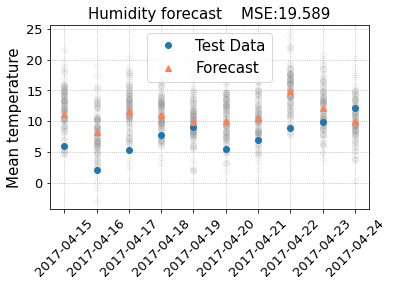

In [451]:
pred, mse_humi, model = _ExpoSmoothing(Train, Test, 'add', 'mul', 12)
simulations = model.simulate(10, repetitions=100, error="additive")
for i in range(len(simulations.T)):
    plt.plot(df.date[len(Train):], simulations.iloc[:,i], 'o', alpha=0.05, color="gray")
plt.grid('on',linestyle = ':')
plt.plot(df.date[len(Train):], Test, 'o', label = 'Test Data')
plt.plot(df.date[len(Train):], pred, '^' ,color= 'coral', label = 'Forecast')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);
plt.legend(fontsize = 15, loc = 'upper center')
plt.xlabel('', fontsize = 15)
plt.ylabel('Mean temperature', fontsize = 15)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.title('Humidity forecast    MSE:%1.3f' % mse_humi, fontsize = 15);
plt.subplots_adjust(left=0.16)
plt.subplots_adjust(bottom=0.24)
plt.savefig("Humidity_forecast_Exp_smoothing.pdf")

# Forecasting wind speed using triple exponential smoothing


In [432]:
# Train-test split
Train = df.wind_speed[:-10]
Test = df.wind_speed[len(Train):]


error_add_add = []
error_add_mul = []
error_mul_add = []
error_mul_mul = []

for seasons in range(3,30):
    
    
    _, mse, _ = _ExpoSmoothing(Train, Test, 'add', 'add', seasons)
    error_add_add.append(mse)
    
    _, mse, _ = _ExpoSmoothing(Train, Test, 'add', 'mul', seasons)
    error_add_mul.append(mse)
    
    _, mse, _ = _ExpoSmoothing(Train, Test, 'mul', 'add', seasons)
    error_mul_add.append(mse)
    
    _, mse, _ = _ExpoSmoothing(Train, Test, 'mul', 'mul', seasons)
    error_mul_mul.append(mse)

print("Mean squared errors for different trend and seasonal types")
data = {'Seasonal_periods':range(3,30), 'Add-Add':error_add_add, 'Add-Mul':error_add_mul, \
        'Mul-Add':error_mul_add, 'Mul-Mul':error_mul_mul} 

C:\Users\debnathk\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\debnathk\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\debnathk\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\debnathk\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\debnathk\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\debnathk\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\debnathk\Anaconda3\lib\site-packages\st

Mean squared errors for different trend and seasonal types


C:\Users\debnathk\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\debnathk\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [433]:
pd.DataFrame(data)

,Seasonal_periods,Add-Add,Add-Mul,Mul-Add,Mul-Mul
0,3,17.826,17.843,18.786,19.616
1,4,16.771,16.663,17.578,18.271
2,5,21.835,23.723,23.184,26.204
3,6,19.397,20.687,21.078,23.197
4,7,17.782,18.342,19.002,20.381
5,8,16.553,16.416,17.343,28.279
6,9,18.680,18.747,19.343,20.551
7,10,25.062,27.956,28.661,30.879
8,11,22.291,26.919,24.354,30.760
9,12,14.609,19.589,18.658,22.217


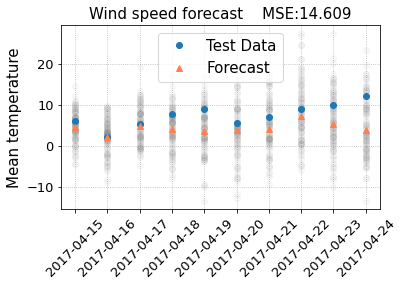

In [450]:
pred, mse_wspeed, model = _ExpoSmoothing(Train, Test, 'add', 'add', 12)
simulations = model.simulate(10, repetitions=100, error="additive")
for i in range(len(simulations.T)):
    plt.plot(df.date[len(Train):], simulations.iloc[:,i], 'o', alpha=0.05, color="gray")
plt.grid('on',linestyle = ':')
plt.plot(df.date[len(Train):], Test, 'o', label = 'Test Data')
plt.plot(df.date[len(Train):], pred, '^' ,color= 'coral', label = 'Forecast')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);
plt.legend(fontsize = 15, loc = 'upper center')
plt.xlabel('', fontsize = 15)
plt.ylabel('Mean temperature', fontsize = 15)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.title('Wind speed forecast    MSE:%1.3f' % mse_wspeed, fontsize = 15);\
plt.subplots_adjust(left=0.16)
plt.subplots_adjust(bottom=0.24)
plt.savefig("Wind_speed_forecast_Exp_smoothing.pdf")